# Can you win your fantasy football league at the draft?

### By Jeremy Harley and Nick Sagun

#### Fantasy football is a rapidly growing phenomenon that has attracted some 40 million-plus players across the globe. For many, this game represents a fun competitive experience played amongst friends. But for people like us, this game means much more. Both of us are currently in a highly competitive and involved fantasy league called the RFL. Currently, the league holds 10 members consisting mostly of close high school friends. Many leagues are similar to ours in that way but the RFL stands out in many forms. Every member in the league takes this game very seriously, there is a handsome yearly league fee which goes to the winner (just in case you needed more reason to win!), there is a yearly in-person rules meeting, draft party, and awards ceremony. Many members also produce videos throughout the year to trash-talk opponents or to talk about their team. Furthermore, we recently were able to create our league website to document the history of our league. The amount of time and effort that we put into this league makes winning that much more precious to us, so we want to find any way to win. This brings us to our question. Can you win your league at the draft? The draft is the most important day of the fantasy season where you draft the 15 players that will make up your roster for the beginning of the year. Therefore, we want to take a look at different draft strategies that have been used in the RFL over the years to determine if one strategy may give you an advantage over using another one. The insights provided in this data analysis could be used by any reader for them to gain an advantage in their leagues before the first week of games even begin. 

## Data Tyding

#### We will import the final standings from each year of the RFL and then merge those results into one complete dataframe

In [113]:
import requests
import datetime
import re
import pandas as pd
from bs4 import BeautifulSoup

# import the final standings for each year from the RFL website
standings = pd.read_html('https://jharley19.github.io/RFL-Webpage/standings.html')
winTwenty = standings[0]
winTwenty.columns = ['2020 Standings', 'Team', '2020 Record', '2020 Win %','Early TE 2020','Early QB 2020', 'RB Heavy 2020','Zero RB 2020', 'Points For 2020', 'Points Against 2020']

winNineteen = standings[1]
winNineteen.columns = ['2019 Standings', 'Team', '2019 Record', '2019 Win %','Early TE 2019','Early QB 2019', 'RB Heavy 2019','Zero RB 2019', 'Points For 2019', 'Points Against 2019']

winEighteen = standings[2]
winEighteen.columns = ['2018 Standings', 'Team', '2018 Record', '2018 Win %','Early TE 2018','Early QB 2018', 'RB Heavy 2018','Zero RB 2018', 'Points For 2018', 'Points Against 2018']

winSeventeen = standings[3]
winSeventeen.columns = ['2017 Standings', 'Team', '2017 Record', '2017 Win %','Early TE 2017','Early QB 2017', 'RB Heavy 2017','Zero RB 2017', 'Points For 2017', 'Points Against 2017']

winSixteen = standings[4]
winSixteen.columns = ['2016 Standings', 'Team', '2016 Record', '2016 Win %','Early TE 2016','Early QB 2016', 'RB Heavy 2016','Zero RB 2016', 'Points For 2016', 'Points Against 2016']

winFifteen = standings[5]
winFifteen.columns = ['2015 Standings', 'Team', '2015 Record', '2015 Win %','Early TE 2015','Early QB 2015', 'RB Heavy 2015','Zero RB 2015', 'Points For 2015', 'Points Against 2015']

winFourteen = standings[6]
winFourteen.columns = ['2014 Standings', 'Team', '2014 Record', '2014 Win %','Early TE 2014','Early QB 2014', 'RB Heavy 2014','Zero RB 2014', 'Points For 2014', 'Points Against 2014']

winThirteen = standings[7]
winThirteen.columns = ['2013 Standings', 'Team', '2013 Record', '2013 Win %','Early TE 2013','Early QB 2013', 'RB Heavy 2013','Zero RB 2013', 'Points For 2013', 'Points Against 2013']

# merge all the tables together to create one complete dataframe
overall = pd.merge(winTwenty, winNineteen, on='Team', how='outer')
overall = pd.merge(overall, winEighteen, on='Team', how='outer')
overall = pd.merge(overall, winSeventeen, on='Team', how='outer')
overall = pd.merge(overall, winSixteen, on='Team', how='outer')
overall = pd.merge(overall, winFifteen, on='Team', how='outer')
overall = pd.merge(overall, winFourteen, on='Team', how='outer')
overall = pd.merge(overall, winThirteen, on='Team', how='outer')

overall

,2020 Standings,Team,2020 Record,2020 Win %,Early TE 2020,Early QB 2020,RB Heavy 2020,Zero RB 2020,Points For 2020,Points Against 2020,...,Points Against 2014,2013 Standings,2013 Record,2013 Win %,Early TE 2013,Early QB 2013,RB Heavy 2013,Zero RB 2013,Points For 2013,Points Against 2013
0,1.0,Gruden's Plan,13-3,81.25,yes,no,yes,no,1799.32,1464.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,The Hurts Helicopter,13-3,81.25,no,yes,yes,no,1861.40,1578.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Maryland Marijuanas,9-7,56.25,no,yes,yes,no,1560.16,1506.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sleepy Nick,7-9,43.75,no,no,no,no,1544.12,1598.16,...,1114.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Goofy God,7-9,43.75,no,no,no,no,1589.12,1799.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Babylon,7-9,43.75,yes,yes,no,yes,1748.48,1848.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,Mullet Man,7-9,43.75,yes,no,no,no,1579.50,1615.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,Big Ounce,5-11,31.25,no,no,no,no,1588.98,1636.22,...,NaN,2.0,11-4,73.33,no,yes,no,yes,1359.88,1124.80
8,9.0,The Dictator,6-9,40.00,no,no,yes,no,1507.50,1595.74,...,817.38,1.0,13-2,86.66,yes,yes,no,yes,1498.90,1134.40
9,10.0,The Red Army,5-10,33.33,no,no,yes,no,1570.28,1705.84,...,1012.92,4.0,6-9,40.00,no,yes,yes,no,1068.66,1185.74


## Data Visualization and Analysis

### RB Heavy Strategy Vs. Zero RB Strategy

#### The running back position is regarded as one of, if not the, most important position in fantasy football. Many experienced players will choose to select two running backs in their first two picks. This is because in a typical starting lineup, you need to start at least two running backs and there are only a handful of valuable running backs available. Due to this positional scarcity, many fantasy players make it a goal to secure two stud running backs with their first two picks in the draft. However, some players believe selecting running backs early is a waste of a pick due to their higher risk of injury and believe that there is plenty of running back value to be found in later rounds. So, we will look at these two different strategies and compare how they have worked in the past of the RFL. The first strategy will be an "RB Heavy" strategy where a player chose to select a running back with both of their first two picks. The second strategy will be the "Zero RB" strategy where a player chose not to select a running back with either of their first two picks. We will compare both strategies by the average win percentage, average finish in the standings, and average points for each team that chose that strategy in a particular year. 

#### First we will go through the dataframe and for each year we will see if the current team did either strategy and if so, we will make note of its win percentage, finish, and points for that season

In [114]:
rbHeavyWinAvg = [0,0,0,0,0,0,0,0]
rbHeavyFinish = [0,0,0,0,0,0,0,0]
rbHeavyPoints = [0,0,0,0,0,0,0,0]
zeroRbWinAvg = [0,0,0,0,0,0,0,0]
zeroRbFinish = [0,0,0,0,0,0,0,0]
zeroRbPoints = [0,0,0,0,0,0,0,0]

numHeavy = [0,0,0,0,0,0,0,0]
numZero = [0,0,0,0,0,0,0,0]

for index, row in overall.iterrows():
    # if the current team played in 2020, see if they used either strategy
    if not(row['RB Heavy 2020'] == 'NaN'):
        if row['RB Heavy 2020'] == 'yes':
            numHeavy[0] = numHeavy[0] + 1
            rbHeavyWinAvg[0] = rbHeavyWinAvg[0] + row['2020 Win %']
            rbHeavyFinish[0] = rbHeavyFinish[0] + row['2020 Standings']
            rbHeavyPoints[0] = rbHeavyPoints[0] + row['Points For 2020']
        elif row['RB Heavy 2020'] == 'no':
                numZero[0] = numZero[0] + 1
                zeroRbWinAvg[0] = zeroRbWinAvg[0] + row['2020 Win %']
                zeroRbFinish[0] = zeroRbFinish[0] + row['2020 Standings']
                zeroRbPoints[0] = zeroRbPoints[0] + row['Points For 2020']
    if not(row['RB Heavy 2019'] == 'NaN'):
        if row['RB Heavy 2019'] == 'yes':
            numHeavy[1] = numHeavy[1] + 1
            rbHeavyWinAvg[1] = rbHeavyWinAvg[1] + row['2019 Win %']
            rbHeavyFinish[1] = rbHeavyFinish[1] + row['2019 Standings']
            rbHeavyPoints[1] = rbHeavyPoints[1] + row['Points For 2019']
        elif row['RB Heavy 2019'] == 'no':
                numZero[1] = numZero[1] + 1
                zeroRbWinAvg[1] = zeroRbWinAvg[1] + row['2019 Win %']
                zeroRbFinish[1] = zeroRbFinish[1] + row['2019 Standings']
                zeroRbPoints[1] = zeroRbPoints[1] + row['Points For 2019']
    if not(row['RB Heavy 2018'] == 'NaN'):
        if row['RB Heavy 2018'] == 'yes':
            numHeavy[2] = numHeavy[2] + 1
            rbHeavyWinAvg[2] = rbHeavyWinAvg[2] + row['2018 Win %']
            rbHeavyFinish[2] = rbHeavyFinish[2] + row['2018 Standings']
            rbHeavyPoints[2] = rbHeavyPoints[2] + row['Points For 2018']
        elif row['RB Heavy 2018'] == 'no':
                numZero[2] = numZero[2] + 1
                zeroRbWinAvg[2] = zeroRbWinAvg[2] + row['2018 Win %']
                zeroRbFinish[2] = zeroRbFinish[2] + row['2018 Standings']
                zeroRbPoints[2] = zeroRbPoints[2] + row['Points For 2018']
    if not(row['RB Heavy 2017'] == 'NaN'):
        if row['RB Heavy 2017'] == 'yes':
            numHeavy[3] = numHeavy[3] + 1
            rbHeavyWinAvg[3] = rbHeavyWinAvg[3] + row['2017 Win %']
            rbHeavyFinish[3] = rbHeavyFinish[3] + row['2018 Standings']
            rbHeavyPoints[3] = rbHeavyPoints[3] + row['Points For 2017']
        elif row['RB Heavy 2017'] == 'no':
                numZero[3] = numZero[3] + 1
                zeroRbWinAvg[3] = zeroRbWinAvg[3] + row['2017 Win %']
                zeroRbFinish[3] = zeroRbFinish[3] + row['2017 Standings']
                zeroRbPoints[3] = zeroRbPoints[3] + row['Points For 2017']
    if not(row['RB Heavy 2016'] == 'NaN'):
        if row['RB Heavy 2016'] == 'yes':
            numHeavy[4] = numHeavy[4] + 1
            rbHeavyWinAvg[4] = rbHeavyWinAvg[4] + row['2016 Win %']
            rbHeavyFinish[4] = rbHeavyFinish[4] + row['2016 Standings']
            rbHeavyPoints[4] = rbHeavyPoints[4] + row['Points For 2016']
        elif row['RB Heavy 2016'] == 'no':
                numZero[4] = numZero[4] + 1
                zeroRbWinAvg[4] = zeroRbWinAvg[4] + row['2016 Win %']
                zeroRbFinish[4] = zeroRbFinish[4] + row['2016 Standings']
                zeroRbPoints[4] = zeroRbPoints[4] + row['Points For 2016']
    if not(row['RB Heavy 2015'] == 'NaN'):
        if row['RB Heavy 2015'] == 'yes':
            numHeavy[5] = numHeavy[5] + 1
            rbHeavyWinAvg[5] = rbHeavyWinAvg[5] + row['2015 Win %']
            rbHeavyFinish[5] = rbHeavyFinish[5] + row['2015 Standings']
            rbHeavyPoints[5] = rbHeavyPoints[5] + row['Points For 2015']
        elif row['RB Heavy 2015'] == 'no':
                numZero[5] = numZero[5] + 1
                zeroRbWinAvg[5] = zeroRbWinAvg[5] + row['2015 Win %']
                zeroRbFinish[5] = zeroRbFinish[5] + row['2015 Standings']
                zeroRbPoints[5] = zeroRbPoints[5] + row['Points For 2015']
    if not(row['RB Heavy 2014'] == 'NaN'):
        if row['RB Heavy 2014'] == 'yes':
            numHeavy[6] = numHeavy[6] + 1
            rbHeavyWinAvg[6] = rbHeavyWinAvg[6] + row['2014 Win %']
            rbHeavyFinish[6] = rbHeavyFinish[6] + row['2014 Standings']
            rbHeavyPoints[6] = rbHeavyPoints[6] + row['Points For 2014']
        elif row['RB Heavy 2014'] == 'no':
                numZero[6] = numZero[6] + 1
                zeroRbWinAvg[6] = zeroRbWinAvg[6] + row['2014 Win %']
                zeroRbFinish[6] = zeroRbFinish[6] + row['2014 Standings']
                zeroRbPoints[6] = zeroRbPoints[6] + row['Points For 2014']
    if not(row['RB Heavy 2013'] == 'NaN'):
        if row['RB Heavy 2013'] == 'yes':
            numHeavy[7] = numHeavy[7] + 1
            rbHeavyWinAvg[7] = rbHeavyWinAvg[7] + row['2013 Win %']
            rbHeavyFinish[7] = rbHeavyFinish[7] + row['2013 Standings']
            rbHeavyPoints[7] = rbHeavyPoints[7] + row['Points For 2013']
        elif row['RB Heavy 2013'] == 'no':
                numZero[7] = numZero[7] + 1
                zeroRbWinAvg[7] = zeroRbWinAvg[7] + row['2013 Win %']
                zeroRbFinish[7] = zeroRbFinish[7] + row['2013 Standings']
                zeroRbPoints[7] = zeroRbPoints[7] + row['Points For 2013']

# in previous years (2015-2017), the heavy running back strategy was not used, thus we will forego those
# years in our analysis
print(numHeavy)
print(numZero)

[5, 2, 2, 0, 0, 0, 1, 1]
[5, 8, 8, 8, 8, 8, 7, 5]


#### The first plot we will look at will be to see a comparison of RB heavy and Zero RB strategies for each year since 2013. As we can see, in the years where the RB Heavy strategy was used (not 2015-2017) three out of the five years showed a significant advantage in winning percentage for teams that employed the RB Heavy strategy. 

<AxesSubplot:title={'center':'Average Win Percentages Each Year'}, xlabel='Years', ylabel='Percentage'>

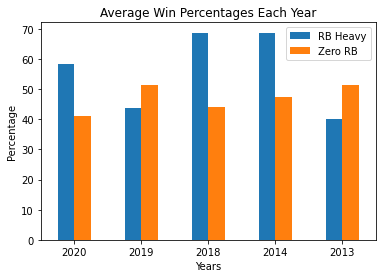

In [116]:
rbHeavyWinAvgFinal = [rbHeavyWinAvg[0]/numHeavy[0],rbHeavyWinAvg[1]/numHeavy[1],rbHeavyWinAvg[2]/numHeavy[2],
                rbHeavyWinAvg[6]/numHeavy[6],rbHeavyWinAvg[7]/numHeavy[7]]
zeroRbWinAvgFinal = [zeroRbWinAvg[0]/numZero[0],zeroRbWinAvg[1]/numZero[1],zeroRbWinAvg[2]/numZero[2],
                zeroRbWinAvg[6]/numZero[6],zeroRbWinAvg[7]/numZero[7]]

index = ['2020','2019','2018','2014','2013']
df = pd.DataFrame({'RB Heavy': rbHeavyWinAvgFinal,
                   'Zero RB': zeroRbWinAvgFinal}, index=index)
ax = df.plot.bar(rot=0, title='Average Win Percentages Each Year')
ax.set_xlabel('Years')
ax.set_ylabel("Percentage")
ax

#### The next plot will illustrate the average final place in the standings of the teams that employed each strategy. As we saw with the last plot, three out of the five years that the RB heavy strategy was used, those players that went RB Heavy placed significantly higher than players that went Zero RB.

<AxesSubplot:title={'center':'Average Finish Each Year'}, xlabel='Years', ylabel='Finish'>

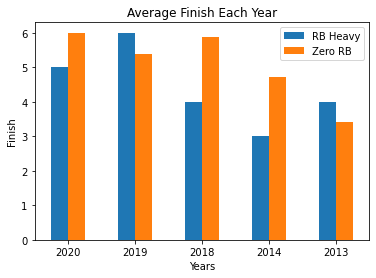

In [117]:

rbHeavyFinishFinal =[rbHeavyFinish[0]/numHeavy[0],rbHeavyFinish[1]/numHeavy[1],rbHeavyFinish[2]/numHeavy[2],
                rbHeavyFinish[6]/numHeavy[6],rbHeavyFinish[7]/numHeavy[7]]
zeroRbFinishFinal = [zeroRbFinish[0]/numZero[0],zeroRbFinish[1]/numZero[1],zeroRbFinish[2]/numZero[2],
                zeroRbFinish[6]/numZero[6],zeroRbFinish[7]/numZero[7]]

index = ['2020','2019','2018','2014','2013']
df = pd.DataFrame({'RB Heavy': rbHeavyFinishFinal,
                   'Zero RB': zeroRbFinishFinal}, index=index)
ax = df.plot.bar(rot=0, title='Average Finish Each Year')
ax.set_xlabel('Years')
ax.set_ylabel("Finish")
ax

#### The next plot will illustrate the average points scored by the teams that employed each strategy. On average, 4 out of the 5 years players who went RB Heavy scored more points compared to players that went Zero RB.

<AxesSubplot:title={'center':'Average Points For Each Year'}, xlabel='Years', ylabel='Points'>

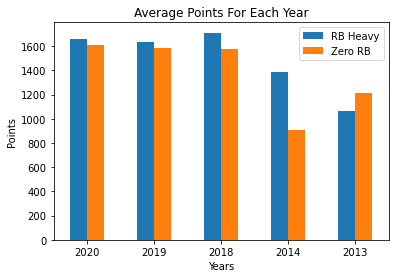

In [118]:
rbHeavyPointsFinal = [rbHeavyPoints[0]/numHeavy[0],rbHeavyPoints[1]/numHeavy[1],rbHeavyPoints[2]/numHeavy[2],
                rbHeavyPoints[6]/numHeavy[6],rbHeavyPoints[7]/numHeavy[7]]
zeroRbPointsFinal = [zeroRbPoints[0]/numZero[0],zeroRbPoints[1]/numZero[1],zeroRbPoints[2]/numZero[2],
                zeroRbPoints[6]/numZero[6],zeroRbPoints[7]/numZero[7]]

index = ['2020','2019','2018','2014','2013']
df = pd.DataFrame({'RB Heavy': rbHeavyPointsFinal,
                   'Zero RB': zeroRbPointsFinal}, index=index)
ax = df.plot.bar(rot=0, title='Average Points For Each Year')
ax.set_xlabel('Years')
ax.set_ylabel("Points")
ax

#### Since we looked at the three measures of success on a year-by-year basis, we will now look at it in its totality. First, we will average the win percentage of every team across history that has used either strategy and compare them using a bar plot. In our plot, we can see that teams that have gone RB Heavy in their drafts have had on average a nearly ten percent higher win percentage than teams that go Zero RB. 

<AxesSubplot:title={'center':'Average Win Percentage Compared to RB Strategy'}, xlabel='Strategy', ylabel='Win Percentage'>

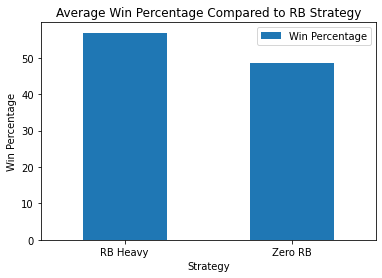

In [119]:
rbHeavyWinAvgSum = sum(rbHeavyWinAvg)/sum(numHeavy)
zeroRbWinAvgSum = sum(zeroRbWinAvg)/sum(numZero)

index = ['RB Heavy','Zero RB']
df = pd.DataFrame({'Strategy':['RB Heavy', 'Zero RB'], 'Win Percentage':[rbHeavyWinAvgSum,zeroRbWinAvgSum ]})
ax = df.plot.bar(x='Strategy', y='Win Percentage', rot=0, title='Average Win Percentage Compared to RB Strategy')
ax.set_xlabel('Strategy')
ax.set_ylabel("Win Percentage")
ax

#### Next, we looked at the average finishes for players that chose either strategy over the course of league history. On average, teams that have gone RB Heavy have placed slightly higher in the league standings compared to teams that ignored the running back position in the first two picks of the draft. 

<AxesSubplot:title={'center':'Average Finish Compared to RB Strategy'}, xlabel='Strategy', ylabel='Wins'>

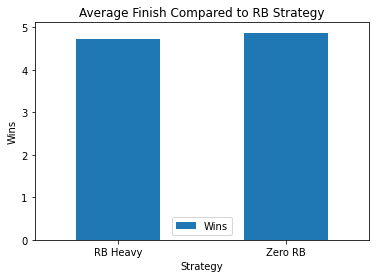

In [121]:
rbHeavyFinishSum = sum(rbHeavyFinish)/sum(numHeavy)
zeroRbFinishSum = sum(zeroRbFinish)/sum(numZero)

index = ['RB Heavy','Zero RB']
df = pd.DataFrame({'Strategy':['RB Heavy', 'Zero RB'], 'Wins':[rbHeavyFinishSum,zeroRbFinishSum ]})
ax = df.plot.bar(x='Strategy', y='Wins', rot=0, title='Average Finish Compared to RB Strategy')
ax.set_xlabel('Strategy')
ax.set_ylabel("Wins")
ax

#### The final plot we looked at was the average points scored by teams that used either strategy throughout league history. On average, teams that have gone double running back with their first two picks in the draft have significantly outscored teams that completely disregard the running back position by nearly 200 points!

<AxesSubplot:title={'center':'Average Points For Compared to RB Strategy'}, xlabel='Strategy', ylabel='Points'>

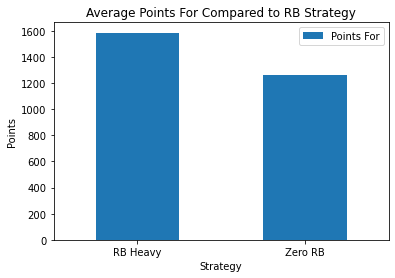

In [122]:
rbHeavyPointsSum = sum(rbHeavyPoints)/sum(numHeavy)
zeroRbPointsSum = sum(zeroRbPoints)/sum(numZero)

index = ['RB Heavy','Zero RB']
df = pd.DataFrame({'Strategy':['RB Heavy', 'Zero RB'], 'Points For':[rbHeavyPointsSum,zeroRbPointsSum ]})
ax = df.plot.bar(x='Strategy', y='Points For', rot=0, title='Average Points For Compared to RB Strategy')
ax.set_xlabel('Strategy')
ax.set_ylabel("Points")
ax

### Conclusion

#### Teams that have elected to go "RB Heavy" and select two running backs with their first two picks in the draft have outperformed teams that refused to select a running back with either of their first two picks. We have seen that RB Heavy teams have on average won more games, finished higher in the standings, and have scored more points than teams who go "Zero RB." Now with this information, a fantasy player can go into their drafts knowing that if they select two running backs with their first two picks instead of fading the running back position entirely they have a statistically higher chance of achieving fantasy success and bringing home the championship along with some cash!

### Is Selecting a Quaterback Early a Viable Strategy?

#### The Quarterback position is a unique one because, in most formats, rosters can only start one. Quarterbacks are known to produce the most points compared to every other position in the game. So, would it not make sense to select the highest producing player first? Well, some fantasy players choose to wait on quarterbacks due to the availability of decent players at the position and the need for only one on the roster. But obviously the longer you wait, the riskier a player at this important position becomes. That being said, let's look at how taking a QB early, meaning selecting one with one of your first five draft picks, affected fantasy player's season by looking at every team's average winning percentage, finishing position, and points scored across league history. 

In [90]:
# for each year, getting win percentage, finish position, and points scored totals for early and late drafted qb's 
earlyQbWinAvg = [0,0,0,0,0,0,0,0]
earlyQbFinish = [0,0,0,0,0,0,0,0]
earlyQbPoints = [0,0,0,0,0,0,0,0]

lateQbWinAvg = [0,0,0,0,0,0,0,0]
lateQbFinish = [0,0,0,0,0,0,0,0]
lateQbPoints = [0,0,0,0,0,0,0,0]

# number of players who utilized strategy each year
numEarly = [0,0,0,0,0,0,0,0]
numLate = [0,0,0,0,0,0,0,0]

for index, row in overall.iterrows():
    # if the current team played in 2020, see if they used either strategy
    if not(row['Early QB 2020'] == 'NaN'):
        if row['Early QB 2020'] == 'yes':
            numEarly[0] = numEarly[0] + 1
            earlyQbWinAvg[0] = earlyQbWinAvg[0] + row['2020 Win %']
            earlyQbFinish[0] = earlyQbFinish[0] + row['2020 Standings']
            earlyQbPoints[0] = earlyQbPoints[0] + row['Points For 2020']
        elif row['Early QB 2020'] == 'no':
                numLate[0] = numLate[0] + 1
                lateQbWinAvg[0] = lateQbWinAvg[0] + row['2020 Win %']
                lateQbFinish[0] = lateQbFinish[0] + row['2020 Standings']
                lateQbPoints[0] = lateQbPoints[0] + row['Points For 2020']              
    if not(row['Early QB 2019'] == 'NaN'):
        if row['Early QB 2019'] == 'yes':
            numEarly[1] = numEarly[1] + 1
            earlyQbWinAvg[1] = earlyQbWinAvg[1] + row['2019 Win %']
            earlyQbFinish[1] = earlyQbFinish[1] + row['2019 Standings']
            earlyQbPoints[1] = earlyQbPoints[1] + row['Points For 2019']
        elif row['Early QB 2019'] == 'no':
                numLate[1] = numLate[1] + 1
                lateQbWinAvg[1] = lateQbWinAvg[1] + row['2019 Win %']
                lateQbFinish[1] = lateQbFinish[1] + row['2019 Standings']
                lateQbPoints[1] = lateQbPoints[1] + row['Points For 2019']                
    if not(row['Early QB 2018'] == 'NaN'):
        if row['Early QB 2018'] == 'yes':
            numEarly[2] = numEarly[2] + 1
            earlyQbWinAvg[2] = earlyQbWinAvg[2] + row['2018 Win %']
            earlyQbFinish[2] = earlyQbFinish[2] + row['2018 Standings']
            earlyQbPoints[2] = earlyQbPoints[2] + row['Points For 2018']
        elif row['Early QB 2018'] == 'no':
                numLate[2] = numLate[2] + 1
                lateQbWinAvg[2] = lateQbWinAvg[2] + row['2018 Win %']
                lateQbFinish[2] = lateQbFinish[2] + row['2018 Standings']
                lateQbPoints[2] = lateQbPoints[2] + row['Points For 2018']               
    if not(row['Early QB 2017'] == 'NaN'):
        if row['Early QB 2017'] == 'yes':
            numEarly[3] = numEarly[3] + 1
            earlyQbWinAvg[3] = earlyQbWinAvg[3] + row['2017 Win %']
            earlyQbFinish[3] = earlyQbFinish[3] + row['2018 Standings']
            earlyQbPoints[3] = earlyQbPoints[3] + row['Points For 2017']
        elif row['Early QB 2017'] == 'no':
                numLate[3] = numLate[3] + 1
                lateQbWinAvg[3] = lateQbWinAvg[3] + row['2017 Win %']
                lateQbFinish[3] = lateQbFinish[3] + row['2017 Standings']
                lateQbPoints[3] = lateQbPoints[3] + row['Points For 2017']               
    if not(row['Early QB 2016'] == 'NaN'):
        if row['Early QB 2016'] == 'yes':
            numEarly[4] = numEarly[4] + 1
            earlyQbWinAvg[4] = earlyQbWinAvg[4] + row['2016 Win %']
            earlyQbFinish[4] = earlyQbFinish[4] + row['2016 Standings']
            earlyQbPoints[4] = earlyQbPoints[4] + row['Points For 2016']
        elif row['Early QB 2016'] == 'no':
                numLate[4] = numLate[4] + 1
                lateQbWinAvg[4] = lateQbWinAvg[4] + row['2016 Win %']
                lateQbFinish[4] = lateQbFinish[4] + row['2016 Standings']
                lateQbPoints[4] = lateQbPoints[4] + row['Points For 2016']               
    if not(row['Early QB 2015'] == 'NaN'):
        if row['Early QB 2015'] == 'yes':
            numEarly[5] = numEarly[5] + 1
            earlyQbWinAvg[5] = earlyQbWinAvg[5] + row['2015 Win %']
            earlyQbFinish[5] = earlyQbFinish[5] + row['2015 Standings']
            earlyQbPoints[5] = earlyQbPoints[5] + row['Points For 2015']
        elif row['Early QB 2015'] == 'no':
                numLate[5] = numLate[5] + 1
                lateQbWinAvg[5] = lateQbWinAvg[5] + row['2015 Win %']
                lateQbFinish[5] = lateQbFinish[5] + row['2015 Standings']
                lateQbPoints[5] = lateQbPoints[5] + row['Points For 2015']               
    if not(row['Early QB 2014'] == 'NaN'):
        if row['Early QB 2014'] == 'yes':
            numEarly[6] = numEarly[6] + 1
            earlyQbWinAvg[6] = earlyQbWinAvg[6] + row['2014 Win %']
            earlyQbFinish[6] = earlyQbFinish[6] + row['2014 Standings']
            earlyQbPoints[6] = earlyQbPoints[6] + row['Points For 2014']
        elif row['Early QB 2014'] == 'no':
                numLate[6] = numLate[6] + 1
                lateQbWinAvg[6] = lateQbWinAvg[6] + row['2014 Win %']
                lateQbFinish[6] = lateQbFinish[6] + row['2014 Standings']
                lateQbPoints[6] = lateQbPoints[6] + row['Points For 2014']     
    if not(row['Early QB 2013'] == 'NaN'):
        if row['Early QB 2013'] == 'yes':
            numEarly[7] = numEarly[7] + 1
            earlyQbWinAvg[7] = earlyQbWinAvg[7] + row['2013 Win %']
            earlyQbFinish[7] = earlyQbFinish[7] + row['2013 Standings']
            earlyQbPoints[7] = earlyQbPoints[7] + row['Points For 2013']
        elif row['Early QB 2013'] == 'no':
                numLate[7] = numLate[7] + 1
                lateQbWinAvg[7] = lateQbWinAvg[7] + row['2013 Win %']
                lateQbFinish[7] = lateQbFinish[7] + row['2013 Standings']
                lateQbPoints[7] = lateQbPoints[7] + row['Points For 2013']            

# in previous years (2013-2017), the late QB strategy was not employed, thus we will forego
# using these years in our analysis
print(numEarly )
print(numLate )

[3, 1, 5, 8, 8, 8, 8, 6]
[7, 9, 5, 0, 0, 0, 0, 0]


#### First, we will take a look at the average winning percentage for the three years where both strategies were used. In two out of the three years presented, teams that took a quarterback early enjoyed a higher winning percentage. It should also be noted that these two years were the last two years in the league, indicating that there might be a trend to selecting a quarterback earlier now rather than in previous years possibly due to higher scoring quarterbacks that are making a larger difference in fantasy football. 

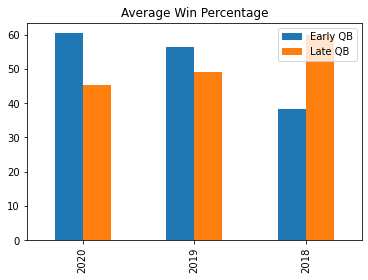

In [91]:
ys =  ['2020', '2019', '2018'] 

earlyQbWinAvgFinal = [earlyQbWinAvg[0]/numEarly[0], earlyQbWinAvg[1]/numEarly[1], earlyQbWinAvg[2]/numEarly[2]]

lateQbWinAvgFinal = [lateQbWinAvg[0]/numLate[0], lateQbWinAvg[1]/numLate[1], lateQbWinAvg[2]/numLate[2]]

df1 = pd.DataFrame({'Early QB': earlyQbWinAvgFinal, 'Late QB': lateQbWinAvgFinal}, index=ys)
ax = df1.plot.bar(title='Average Win Percentage', rot=0)

#### Next, we will look at the average finish in the standings of players that used either strategy. From here, we see a similar trend to the previous plot in that in the two previous years of the league, players who snagged a quarterback in an early-round placed much higher in the leaderboard. 

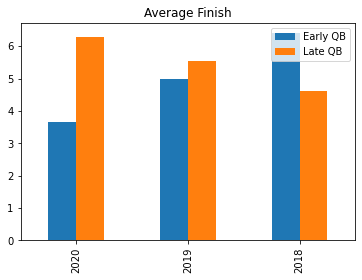

In [97]:
earlyQbFinishFinal = [earlyQbFinish[0]/numEarly[0], earlyQbFinish[1]/numEarly[1], earlyQbFinish[2]/numEarly[2]]

lateQbFinishFinal = [lateQbFinish[0]/numLate[0], lateQbFinish[1]/numLate[1], lateQbFinish[2]/numLate[2]]

df1 = pd.DataFrame({'Early QB': earlyQbFinishFinal, 'Late QB': lateQbFinishFinal}, index=ys)
ax = df1.plot.bar(title='Average Finish', rot=0)

#### Now we will examine average points scored by teams that used either strategy in each of the years. This plot here tells a little different story than the other two. This would seem to indicate that teams that selected a quarterback later in the draft scored more points on average in two out of the three years presented. 

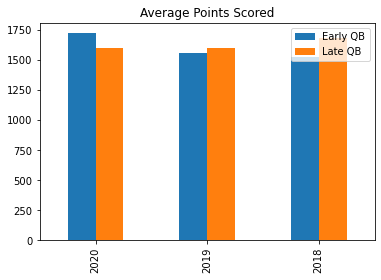

In [98]:
earlyQbPointsFinal = [earlyQbPoints[0]/numEarly[0], earlyQbPoints[1]/numEarly[1], earlyQbPoints[2]/numEarly[2]]

lateQbPointsFinal = [lateQbPoints[0]/numLate[0], lateQbPoints[1]/numLate[1], lateQbPoints[2]/numLate[2]]

df1 = pd.DataFrame({'Early QB': earlyQbPointsFinal, 'Late QB': lateQbPointsFinal}, index=ys)
ax = df1.plot.bar(title='Average Points Scored', rot=0)

#### Ok, so looking year-by-year indicated that there has been a recent trend of success when drafting a quarterback in earlier rounds. But let us see how this strategy has fared on average across league history. First, let us compile the average winning percentage for players who used either strategy. Here we can see that teams that did select a quarterback in later rounds actually still have a higher winning percentage than teams that chose to select one early, despite the recent trend of success. 

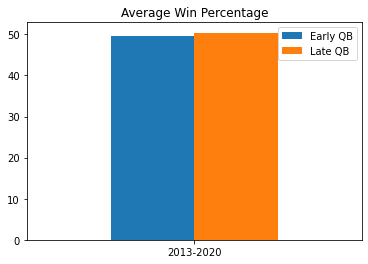

In [95]:
earlyAvg = sum(earlyQbWinAvg) / sum(numEarly)    
lateAvg = sum(lateQbWinAvg) / sum(numLate)

df1 = pd.DataFrame({'Early QB': earlyAvg, 'Late QB': lateAvg}, index=['2013-2020'])
ax = df1.plot.bar(title='Average Win Percentage', rot=0)

#### Now let us look at the average finish for teams that used either strategy across league history. Now, this is very interesting. Teams that have gone early quarterback tend to finish higher in the standings than those who went late quarterback, despite the late quarterback strategy providing a higher winning percentage. Now, this could indicate that going quarterback later is a more boom-or-bust strategy compared to going with one early. 

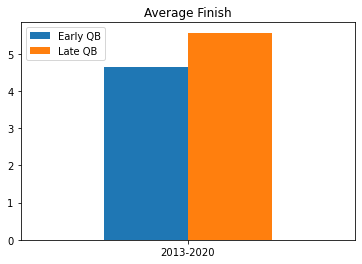

In [104]:
earlyAvg = sum(earlyQbFinish) / sum(numEarly)  
lateAvg = sum(lateQbFinish) / sum(numLate) 

df1 = pd.DataFrame({'Early QB': earlyAvg, 'Late QB': lateAvg}, index=['2013-2020'])
ax = df1.plot.bar(title='Average Finish',rot=0)

#### Lastly, we examine the points scored on average for each strategy across league history. Here we find that teams that went later on quarterback also scored significantly more points than teams that used an early pick on quarterbacks. 

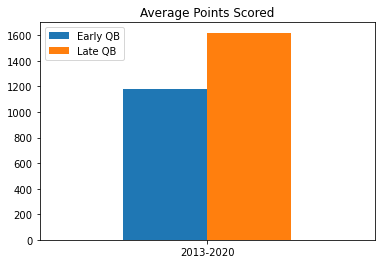

In [102]:
earlyAvg = sum(earlyQbPoints) / sum(numEarly)    
lateAvg = sum(lateQbPoints) / sum(numLate)   

df1 = pd.DataFrame({'Early QB': earlyAvg, 'Late QB': lateAvg}, index=['2013-2020'])
ax = df1.plot.bar(title='Average Points Scored',rot=0)

### Conclusion

#### Teams that have elected to go with a quarterback in early rounds have received more success in recent years. However, we found that going later on quarterbacks also translated to success for some teams as they have a higher winning percentage on average across history than teams who went Early QB. However, Late QB teams have placed much lower in standings than teams who got one early. Thus, this has led us to believe that it is much safer to select a quarterback in one of the first five rounds, but if you want to win your league you can not necessarily choose the "safe" option. Thus, if you can go with a later quarterback and have that quarterback perform well, you could load up on other positions in earlier rounds which would allow your team to achieve much more success. But it should be noted that selecting a late quarterback that does well can be a very difficult thing to do. 

### Is taking a Tight End early a viable strategy?

#### Tight ends are the most tricky position in fantasy football. Similar to QB, teams typically play one, but in some leagues (like the RFL) you can elect to play multiple. The great tight ends are few and far between so having a reliable tight end can be a difference-maker. However, choosing to go with a tight end early would mean foregoing selecting other important positions like a wide receiver and running back. So how important is the TE position and does taking a tight end with one of your first five picks play a role in your season's success?

In [105]:
# for each year, get win percentage, finish position, and points scored totals for early and late drafted te's 

earlyTeWinAvg = [0,0,0,0,0,0,0,0]
earlyTeFinish = [0,0,0,0,0,0,0,0]
earlyTePoints = [0,0,0,0,0,0,0,0]

lateTeWinAvg = [0,0,0,0,0,0,0,0]
lateTeFinish = [0,0,0,0,0,0,0,0]
lateTePoints = [0,0,0,0,0,0,0,0]

# number of players who utilized strategy each year
numEarly = [0,0,0,0,0,0,0,0]
numLate = [0,0,0,0,0,0,0,0]

for index, row in overall.iterrows():
    # if the current team played in 2020, see if they used either strategy
    if not(row['Early TE 2020'] == 'NaN'):
        if row['Early TE 2020'] == 'yes':
            numEarly[0] = numEarly[0] + 1
            earlyTeWinAvg[0] = earlyTeWinAvg[0] + row['2020 Win %']
            earlyTeFinish[0] = earlyTeFinish[0] + row['2020 Standings']
            earlyTePoints[0] = earlyTePoints[0] + row['Points For 2020']
        elif row['Early TE 2020'] == 'no':
                numLate[0] = numLate[0] + 1
                lateTeWinAvg[0] = lateTeWinAvg[0] + row['2020 Win %']
                lateTeFinish[0] = lateTeFinish[0] + row['2020 Standings']
                lateTePoints[0] = lateTePoints[0] + row['Points For 2020']              
    if not(row['Early TE 2019'] == 'NaN'):
        if row['Early TE 2019'] == 'yes':
            numEarly[1] = numEarly[1] + 1
            earlyTeWinAvg[1] = earlyTeWinAvg[1] + row['2019 Win %']
            earlyTeFinish[1] = earlyTeFinish[1] + row['2019 Standings']
            earlyTePoints[1] = earlyTePoints[1] + row['Points For 2019']
        elif row['Early TE 2019'] == 'no':
                numLate[1] = numLate[1] + 1
                lateTeWinAvg[1] = lateTeWinAvg[1] + row['2019 Win %']
                lateTeFinish[1] = lateTeFinish[1] + row['2019 Standings']
                lateTePoints[1] = lateTePoints[1] + row['Points For 2019']                
    if not(row['Early TE 2018'] == 'NaN'):
        if row['Early TE 2018'] == 'yes':
            numEarly[2] = numEarly[2] + 1
            earlyTeWinAvg[2] = earlyTeWinAvg[2] + row['2018 Win %']
            earlyTeFinish[2] = earlyTeFinish[2] + row['2018 Standings']
            earlyTePoints[2] = earlyTePoints[2] + row['Points For 2018']
        elif row['Early TE 2018'] == 'no':
                numLate[2] = numLate[2] + 1
                lateTeWinAvg[2] = lateTeWinAvg[2] + row['2018 Win %']
                lateTeFinish[2] = lateTeFinish[2] + row['2018 Standings']
                lateTePoints[2] = lateTePoints[2] + row['Points For 2018']               
    if not(row['Early TE 2017'] == 'NaN'):
        if row['Early TE 2017'] == 'yes':
            numEarly[3] = numEarly[3] + 1
            earlyTeWinAvg[3] = earlyTeWinAvg[3] + row['2017 Win %']
            earlyTeFinish[3] = earlyTeFinish[3] + row['2018 Standings']
            earlyTePoints[3] = earlyTePoints[3] + row['Points For 2017']
        elif row['Early TE 2017'] == 'no':
                numLate[3] = numLate[3] + 1
                lateTeWinAvg[3] = lateTeWinAvg[3] + row['2017 Win %']
                lateTeFinish[3] = lateTeFinish[3] + row['2017 Standings']
                lateTePoints[3] = lateTePoints[3] + row['Points For 2017']               
    if not(row['Early TE 2016'] == 'NaN'):
        if row['Early TE 2016'] == 'yes':
            numEarly[4] = numEarly[4] + 1
            earlyTeWinAvg[4] = earlyTeWinAvg[4] + row['2016 Win %']
            earlyTeFinish[4] = earlyTeFinish[4] + row['2016 Standings']
            earlyTePoints[4] = earlyTePoints[4] + row['Points For 2016']
        elif row['Early TE 2016'] == 'no':
                numLate[4] = numLate[4] + 1
                lateTeWinAvg[4] = lateTeWinAvg[4] + row['2016 Win %']
                lateTeFinish[4] = lateTeFinish[4] + row['2016 Standings']
                lateTePoints[4] = lateTePoints[4] + row['Points For 2016']               
    if not(row['Early TE 2015'] == 'NaN'):
        if row['Early TE 2015'] == 'yes':
            numEarly[5] = numEarly[5] + 1
            earlyTeWinAvg[5] = earlyTeWinAvg[5] + row['2015 Win %']
            earlyTeFinish[5] = earlyTeFinish[5] + row['2015 Standings']
            earlyTePoints[5] = earlyTePoints[5] + row['Points For 2015']
        elif row['Early TE 2015'] == 'no':
                numLate[5] = numLate[5] + 1
                lateTeWinAvg[5] = lateTeWinAvg[5] + row['2015 Win %']
                lateTeFinish[5] = lateTeFinish[5] + row['2015 Standings']
                lateTePoints[5] = lateTePoints[5] + row['Points For 2015']               
    if not(row['Early TE 2014'] == 'NaN'):
        if row['Early TE 2014'] == 'yes':
            numEarly[6] = numEarly[6] + 1
            earlyTeWinAvg[6] = earlyTeWinAvg[6] + row['2014 Win %']
            earlyTeFinish[6] = earlyTeFinish[6] + row['2014 Standings']
            earlyTePoints[6] = earlyTePoints[6] + row['Points For 2014']
        elif row['Early TE 2014'] == 'no':
                numLate[6] = numLate[6] + 1
                lateTeWinAvg[6] = lateTeWinAvg[6] + row['2014 Win %']
                lateTeFinish[6] = lateTeFinish[6] + row['2014 Standings']
                lateTePoints[6] = lateTePoints[6] + row['Points For 2014']     
    if not(row['Early TE 2013'] == 'NaN'):
        if row['Early TE 2013'] == 'yes':
            numEarly[7] = numEarly[7] + 1
            earlyTeWinAvg[7] = earlyTeWinAvg[7] + row['2013 Win %']
            earlyTeFinish[7] = earlyTeFinish[7] + row['2013 Standings']
            earlyTePoints[7] = earlyTePoints[7] + row['Points For 2013']
        elif row['Early TE 2013'] == 'no':
                numLate[7] = numLate[7] + 1
                lateTeWinAvg[7] = lateTeWinAvg[7] + row['2013 Win %']
                lateTeFinish[7] = lateTeFinish[7] + row['2013 Standings']
                lateTePoints[7] = lateTePoints[7] + row['Points For 2013']            
                

#### Let's first go year-by-year and examine the average winning percentage of teams that selected each strategy. This plot is very telling. In about six out of the eight years, teams that went with an early tight end had a noticeably higher winning percentage than teams who went with one later. 

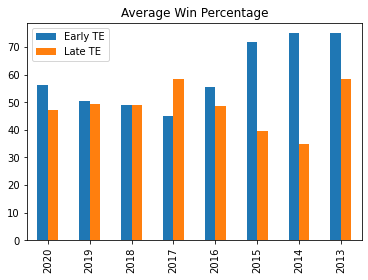

In [106]:
years = ['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013']

earlyTeWinAvgFinal = [earlyTeWinAvg[0]/numEarly[0], earlyTeWinAvg[1]/numEarly[1], earlyTeWinAvg[2]/numEarly[2],
                      earlyTeWinAvg[3]/numEarly[3], earlyTeWinAvg[4]/numEarly[4], earlyTeWinAvg[5]/numEarly[5], 
                      earlyTeWinAvg[6]/numEarly[6], earlyTeWinAvg[6]/numEarly[7]]

lateTeWinAvgFinal = [lateTeWinAvg[0]/numLate[0], lateTeWinAvg[1]/numLate[1], lateTeWinAvg[2]/numLate[2],
                      lateTeWinAvg[3]/numLate[3], lateTeWinAvg[4]/numLate[4], lateTeWinAvg[5]/numLate[5], 
                      lateTeWinAvg[6]/numLate[6], lateTeWinAvg[6]/numLate[7]]

df1 = pd.DataFrame({'Early TE': earlyTeWinAvgFinal, 'Late TE': lateTeWinAvgFinal}, index=years)
ax = df1.plot.bar(title='Average Win Percentage', rot=0)


#### Next, we will look at the average finish in the standings of teams that used either strategy for each year. This time we see that if you selected a TE early in a staggering seven out of the eight years, you finished on average higher than teams that did not get one early. 

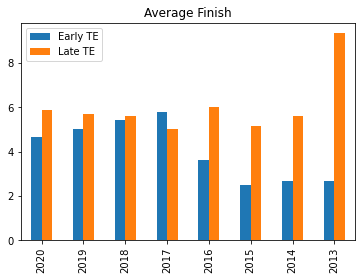

In [107]:
earlyTeFinishFinal = [earlyTeFinish[0]/numEarly[0], earlyTeFinish[1]/numEarly[1], earlyTeFinish[2]/numEarly[2],
                      earlyTeFinish[3]/numEarly[3], earlyTeFinish[4]/numEarly[4], earlyTeFinish[5]/numEarly[5], 
                      earlyTeFinish[6]/numEarly[6], earlyTeFinish[6]/numEarly[7]]

lateTeFinishFinal = [lateTeFinish[0]/numLate[0], lateTeFinish[1]/numLate[1], lateTeFinish[2]/numLate[2],
                      lateTeFinish[3]/numLate[3], lateTeFinish[4]/numLate[4], lateTeFinish[5]/numLate[5], 
                      lateTeFinish[6]/numLate[6], lateTeFinish[6]/numLate[7]]

df1 = pd.DataFrame({'Early TE': earlyTeFinishFinal, 'Late TE': lateTeFinishFinal}, index=years)
ax = df1.plot.bar(title='Average Finish', rot=0)

#### Next, we will look at the average points scored of teams that used either strategy for each year. Again we see that if you selected a TE early in seven out of the eight years, you scored on average more points than teams that did not get a tight end early. 

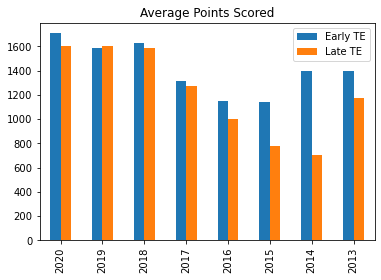

In [108]:
earlyTePointsFinal = [earlyTePoints[0]/numEarly[0], earlyTePoints[1]/numEarly[1], earlyTePoints[2]/numEarly[2],
                      earlyTePoints[3]/numEarly[3], earlyTePoints[4]/numEarly[4], earlyTePoints[5]/numEarly[5], 
                      earlyTePoints[6]/numEarly[6], earlyTePoints[6]/numEarly[7]]

lateTePointsFinal = [lateTePoints[0]/numLate[0], lateTePoints[1]/numLate[1], lateTePoints[2]/numLate[2],
                      lateTePoints[3]/numLate[3], lateTePoints[4]/numLate[4], lateTePoints[5]/numLate[5], 
                      lateTePoints[6]/numLate[6], lateTePoints[6]/numLate[7]]

df1 = pd.DataFrame({'Early TE': earlyTePointsFinal, 'Late TE': lateTePointsFinal}, index=years)
ax = df1.plot.bar(title='Average Points Scored', rot=0)

#### Maybe the year-by-year analysis might have some bias to it so let us look at each of these measures of success as a whole. Starting with the average winning percentage for each team that used either strategy. Again we see that teams that selected a tight end early averaged around 10% more wins per season. 

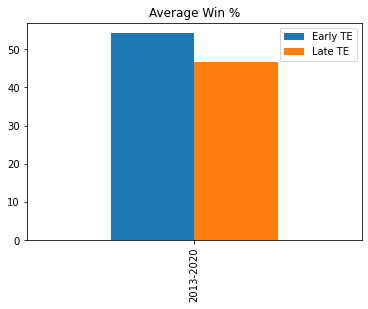

In [110]:
earlyAvg = sum(earlyTeWinAvg) / sum(numEarly)   
lateAvg = sum(lateTeWinAvg) / sum(numLate) 

df1 = pd.DataFrame({'Early TE': earlyAvg, 'Late TE': lateAvg}, index=['2013-2020'])
ax = df1.plot.bar(title='Average Win %', rot=0)

#### Next, we look at the average finish for each team that used either strategy. Again we see that teams that selected a tight end early averaged around 1 entire place higher in the standings. 

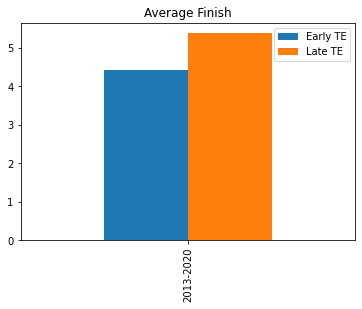

In [111]:
earlyAvg = sum(earlyTeFinish) / sum(numEarly)    
lateAvg = sum(lateTeFinish) / sum(numLate)   

df1 = pd.DataFrame({'Early TE': earlyAvg, 'Late TE': lateAvg}, index=['2013-2020'])
ax = df1.plot.bar(title='Average Finish', rot=0)

#### Finally, we look at the average points scored for each team that used either strategy. Again we see that teams that selected a tight end early averaged around 200 more points per season.  

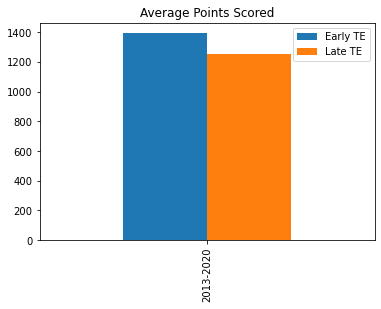

In [112]:
earlyAvg = sum(earlyTePoints) / sum(numEarly)    
lateAvg = sum(lateTePoints) / sum(numLate) 

df1 = pd.DataFrame({'Early TE': earlyAvg, 'Late TE': lateAvg}, index=['2013-2020'])
ax = df1.plot.bar(title='Average Points Scored', rot=0)

### Conclusion

#### Here we saw decisive evidence that points to selecting a tight end earlier equating to higher success in fantasy football. Nearly every year teams that went to pick a tight end early averaged more points, more wins, and a higher final seeding than teams that faded the position. Therefore, selecting a tight end early should give you a higher chance of winning your league.  

## Summary

#### After looking at six different strategies that fantasy football players use every draft season, we were able to determine which ones lead you toward higher success compared to others. We first found that choosing to go with back-to-back running backs in the first two rounds of your draft will provide you with higher success in terms of on average scoring more points, getting more wins, and placing higher in the final standings compared to the newly popular "Zero RB" strategy that chooses to not use either of their first picks on the important running back position. Beyond running backs, we found that it is safer to select a quarterback early however teams that faded the quarterback position enjoyed a higher winning percentage yet finished lower in the standings. This indicates that selecting a quarterback later is more boom-or-bust for teams, but you need to be a little more risky if you want to beat 9 or 11 other teams in your leagues. Lastly, we discovered that selecting a tight end early correlated to success across the history of the RFL. Therefore, if you are looking to win your leagues, much like we are, it is in your favor to select two running backs with your first two picks, making sure to get a tight end with one of your first five picks, and choosing to fade the quarterback position and hoping to hit on a potentially league-winning quarterback in one of the later rounds.

#### If you want to learn more about different fantasy football strategies, I would recommend reading this Sporting News article outlining various strategies: https://www.sportingnews.com/us/fantasy/news/fantasy-football-draft-strategy-best-tips-advice-2021-snake-draft/x2f4rzedzdpb1iiuwti9dpcqj or this article written by the Fantasy Football Counselor: https://thefantasyfootballcounselor.com/fantasy-football-draft-strategy/

#### If you are not a fantasy football fanatic and after reading our analysis you are desiring to know more about the game, check out this article by Sports Illustrated that outlines some of the basic concepts of fantasy football such as the scoring system and roster formats: https://www.si.com/fantasy/2020/04/04/fantasy-football-advice-guide-for-beginners

#### Lastly, if you want to check out the league in which we both play in and where we received the data check out our new website here: https://jharley19.github.io/RFL-Webpage/standings.html